                                          -LINEAR REGRESSION ASSIGNMENT-
                                          
                        Building Multiple Linear Regression Model For A Bike Sharing System

`SUBMITTED BY`:- **Kartikey Shukla**

`Batch`:- **upGrad & IIITB | Data Science Program - February 2022**

## Problem Statement

-  A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.* 

- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation.

- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

>•	Which variables are significant in predicting the demand for shared bikes.

>•	How well those variables describe the bike demands.


## Business Goal

>*You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.* 


## Objective

>**This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.** 

## `A) IMPORTING AND UNDERSTANDING DATASET`

In [44]:
# Importing all the necessary libraries and Supressing Warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Reading the CSV File

Bikesys= pd.read_csv('day.csv')

In [47]:
# Checking the first few Rows of the dataset

Bikesys.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [49]:
# Checking the shape of the dataset

Bikesys.shape

(730, 16)

In [50]:
# Describing the dataset

Bikesys.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [51]:
# Checking for Null Values and Datatypes

Bikesys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## `B) Cleaning the Data`

In [52]:
# Renaming columns for better understanding

Bikesys.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [53]:
Bikesys.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [54]:
# Dropping Unnecessary Columns

Bikesys.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [57]:
# Mapping Necessary columns for better understanding

Bikesys.season = Bikesys.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
Bikesys.month = Bikesys.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
Bikesys.weekday = Bikesys.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
Bikesys.weathersit = Bikesys.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [59]:
Bikesys.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## `C) Visualizing the Data`

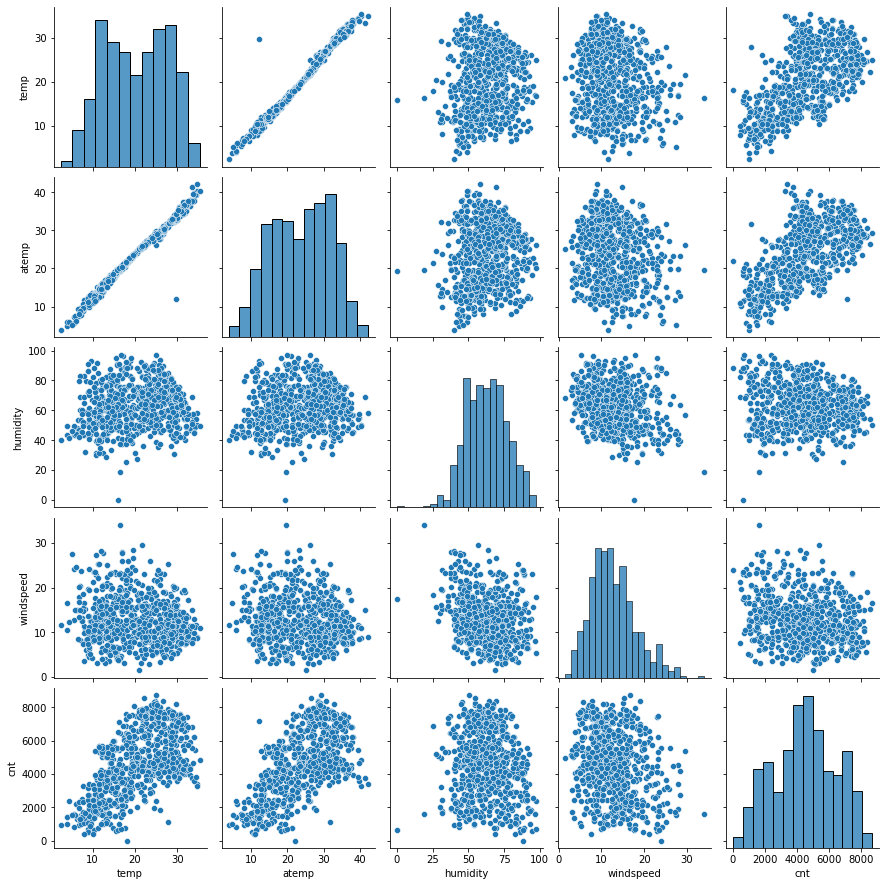

In [60]:
# Visualising the Numerical Columns

sns.pairplot(data=Bikesys,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

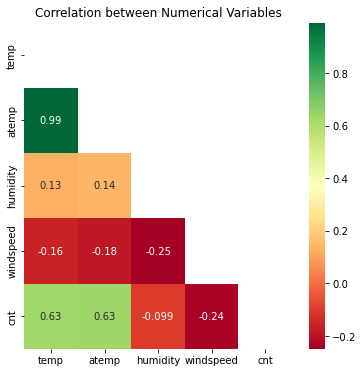

In [61]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(Bikesys[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(Bikesys[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

*`There is linear relationship between temp and atemp. 
Both the parameters cannot be used in building the model due to multicolinearity. 
We will decide which parameters to keep based on VIF and p-value w.r.t other variables.`*

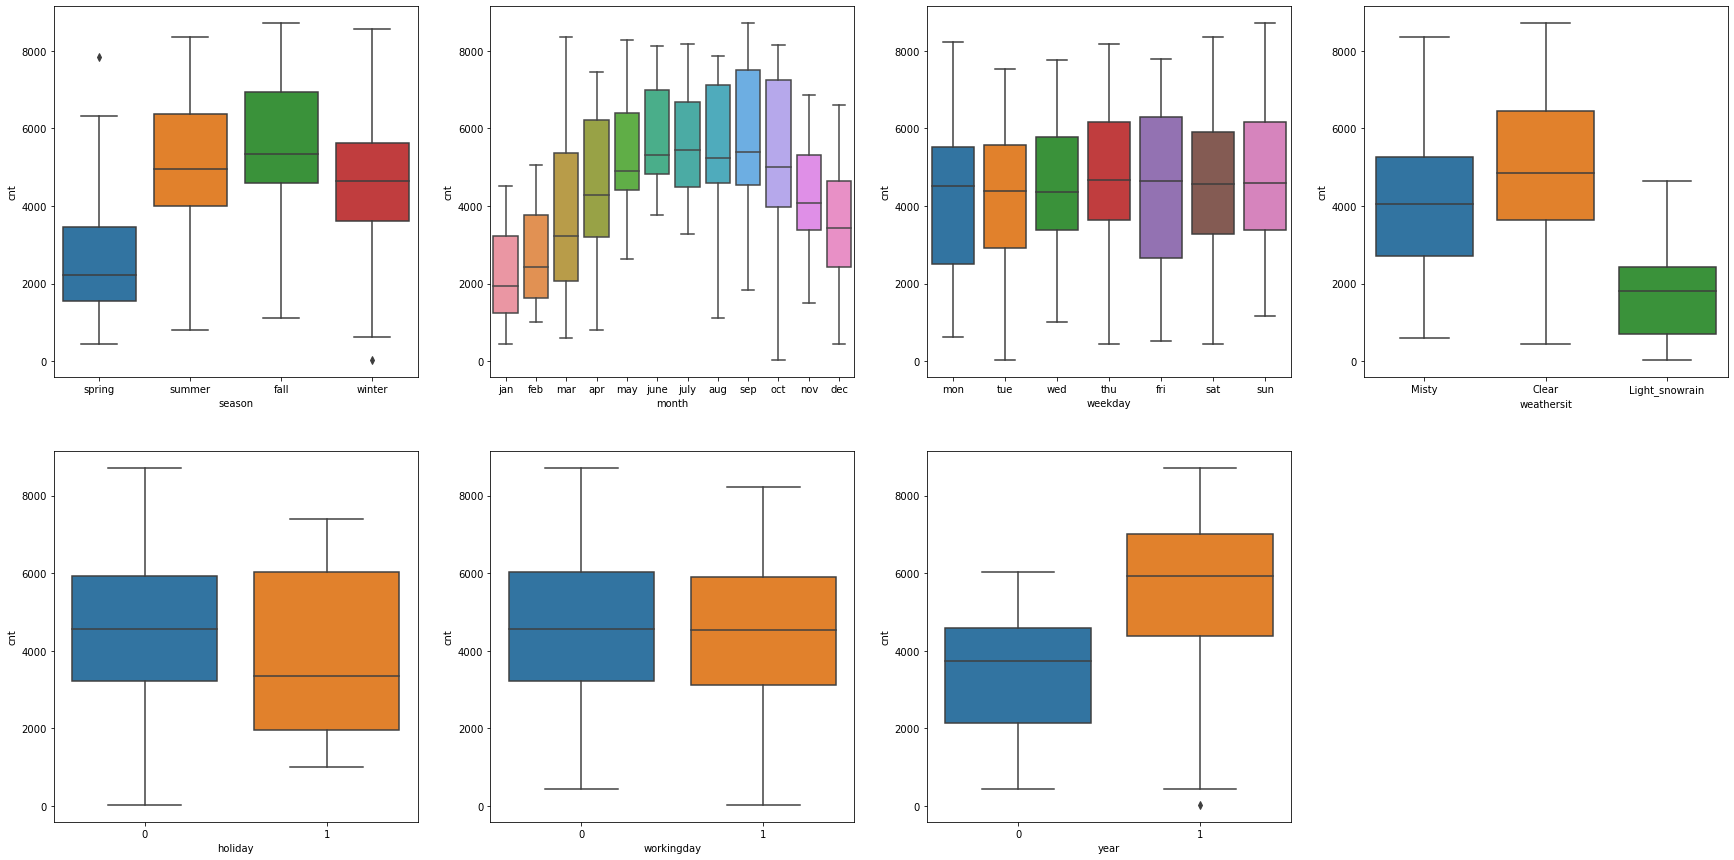

In [69]:
# Visualizing the Categorical Columns

plt.figure(figsize=(30, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bikesys)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = Bikesys)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikesys)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikesys)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikesys)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikesys)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = Bikesys)
plt.show()

In [145]:
# Defining a function "CatCol" for creating barplots 

def CatCol(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=Bikesys)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=Bikesys, hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

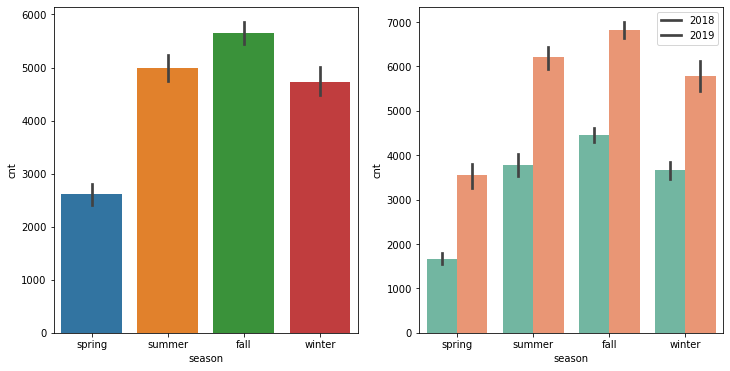

In [146]:
# Plotting Barplot for Season Column

CatCol('season')

**`Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.`**

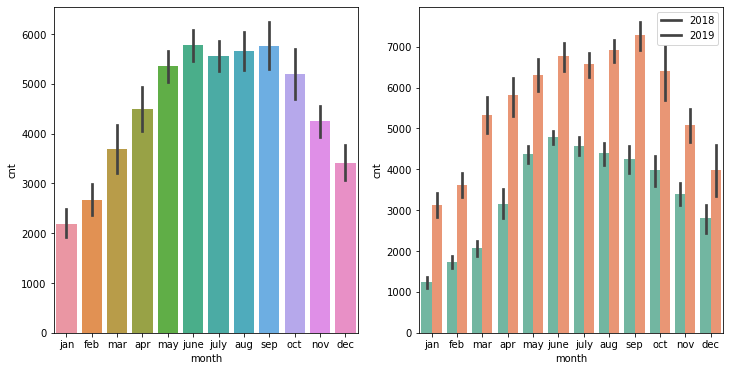

In [147]:
# Plotting Barplot for Month Column

CatCol('month')

**`Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.`**

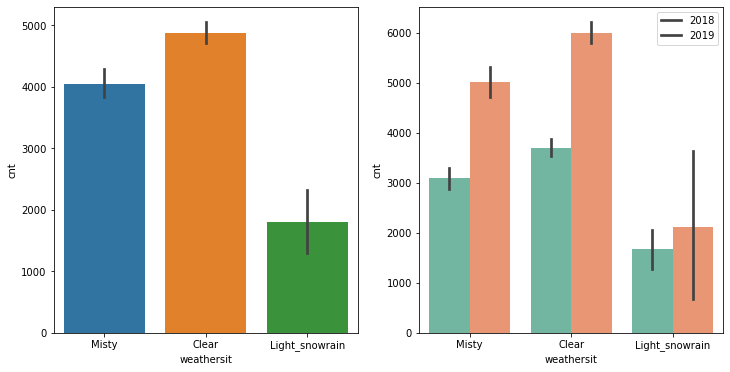

In [148]:
# Plotting Barplot for Weathersit Column

CatCol('weathersit')

**`Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.`**

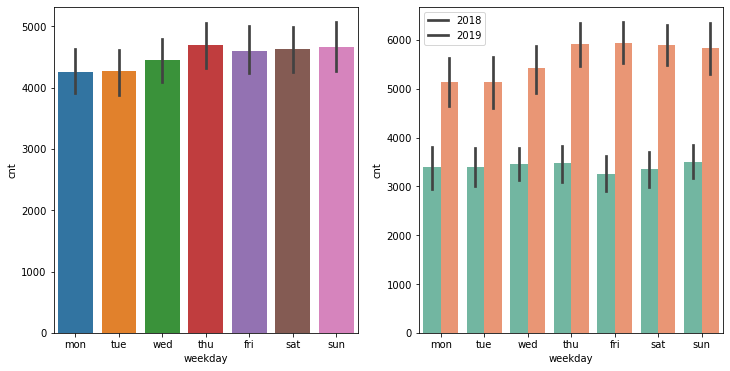

In [149]:
# Plotting Barplot for Weekday Column

CatCol('weekday')

**`Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.`**

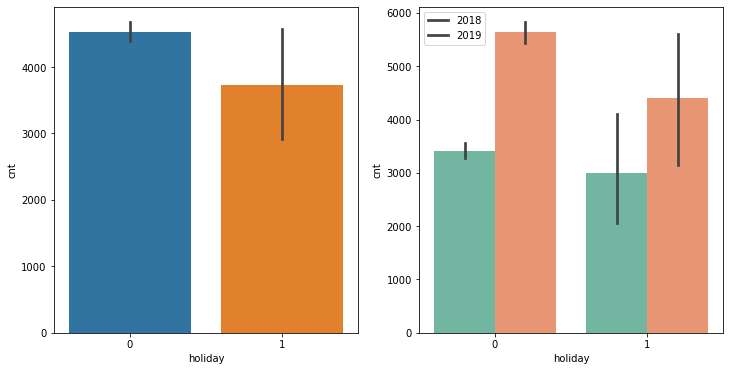

In [150]:
# Plotting Barplot for Holiday Column

CatCol('holiday')

**`When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.`**

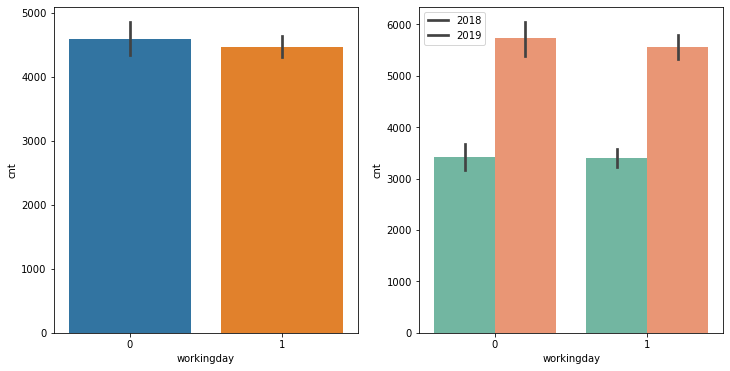

In [151]:
# Plotting Barplot for Workingday Column

CatCol('workingday')

**`Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.`**

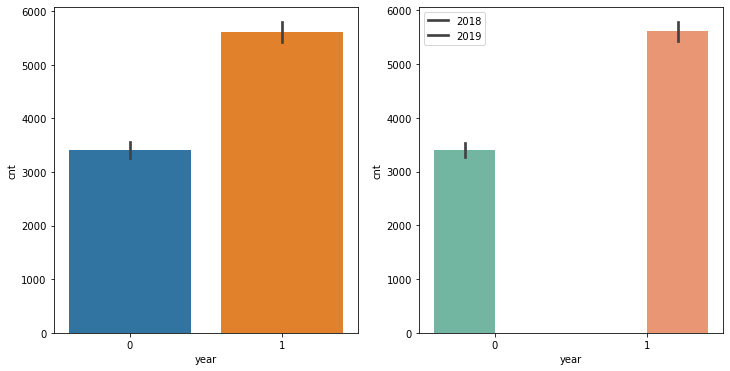

In [152]:
# Plotting Barplot for Year Column

CatCol('year')

**`2019 attracted more number of booking from previous year, which shows good progress in terms of business.`**

## `D) Data Preparation`

In [79]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(Bikesys.month,drop_first=True)
weekdays_df=pd.get_dummies(Bikesys.weekday,drop_first=True)
weathersit_df=pd.get_dummies(Bikesys.weathersit,drop_first=True)
seasons_df=pd.get_dummies(Bikesys.season,drop_first=True)

In [80]:
Bikesys.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [81]:
# Merging the dataframe, with the dummy variable dataset. 

BikeSysNew = pd.concat([Bikesys,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [82]:
BikeSysNew.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [84]:
BikeSysNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [85]:
# dropping unnecessary columns as we have already created dummy variable out of it.

BikeSysNew.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [86]:
BikeSysNew.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
# Checking the shape of new dataframe

BikeSysNew.shape

(730, 30)

## `E) Splitting the data into Training and Testing Sets`

In [88]:
# Splitting the dataframe into Train and Test

df_train, df_test = train_test_split(BikeSysNew, train_size = 0.7, test_size = 0.3, random_state = 100)

In [89]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [90]:
# check the shape of testing datatset

df_test.shape

(219, 30)

## `F) Rescaling The Features`

In [91]:
scaler = MinMaxScaler()

In [92]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0


In [93]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [94]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [95]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


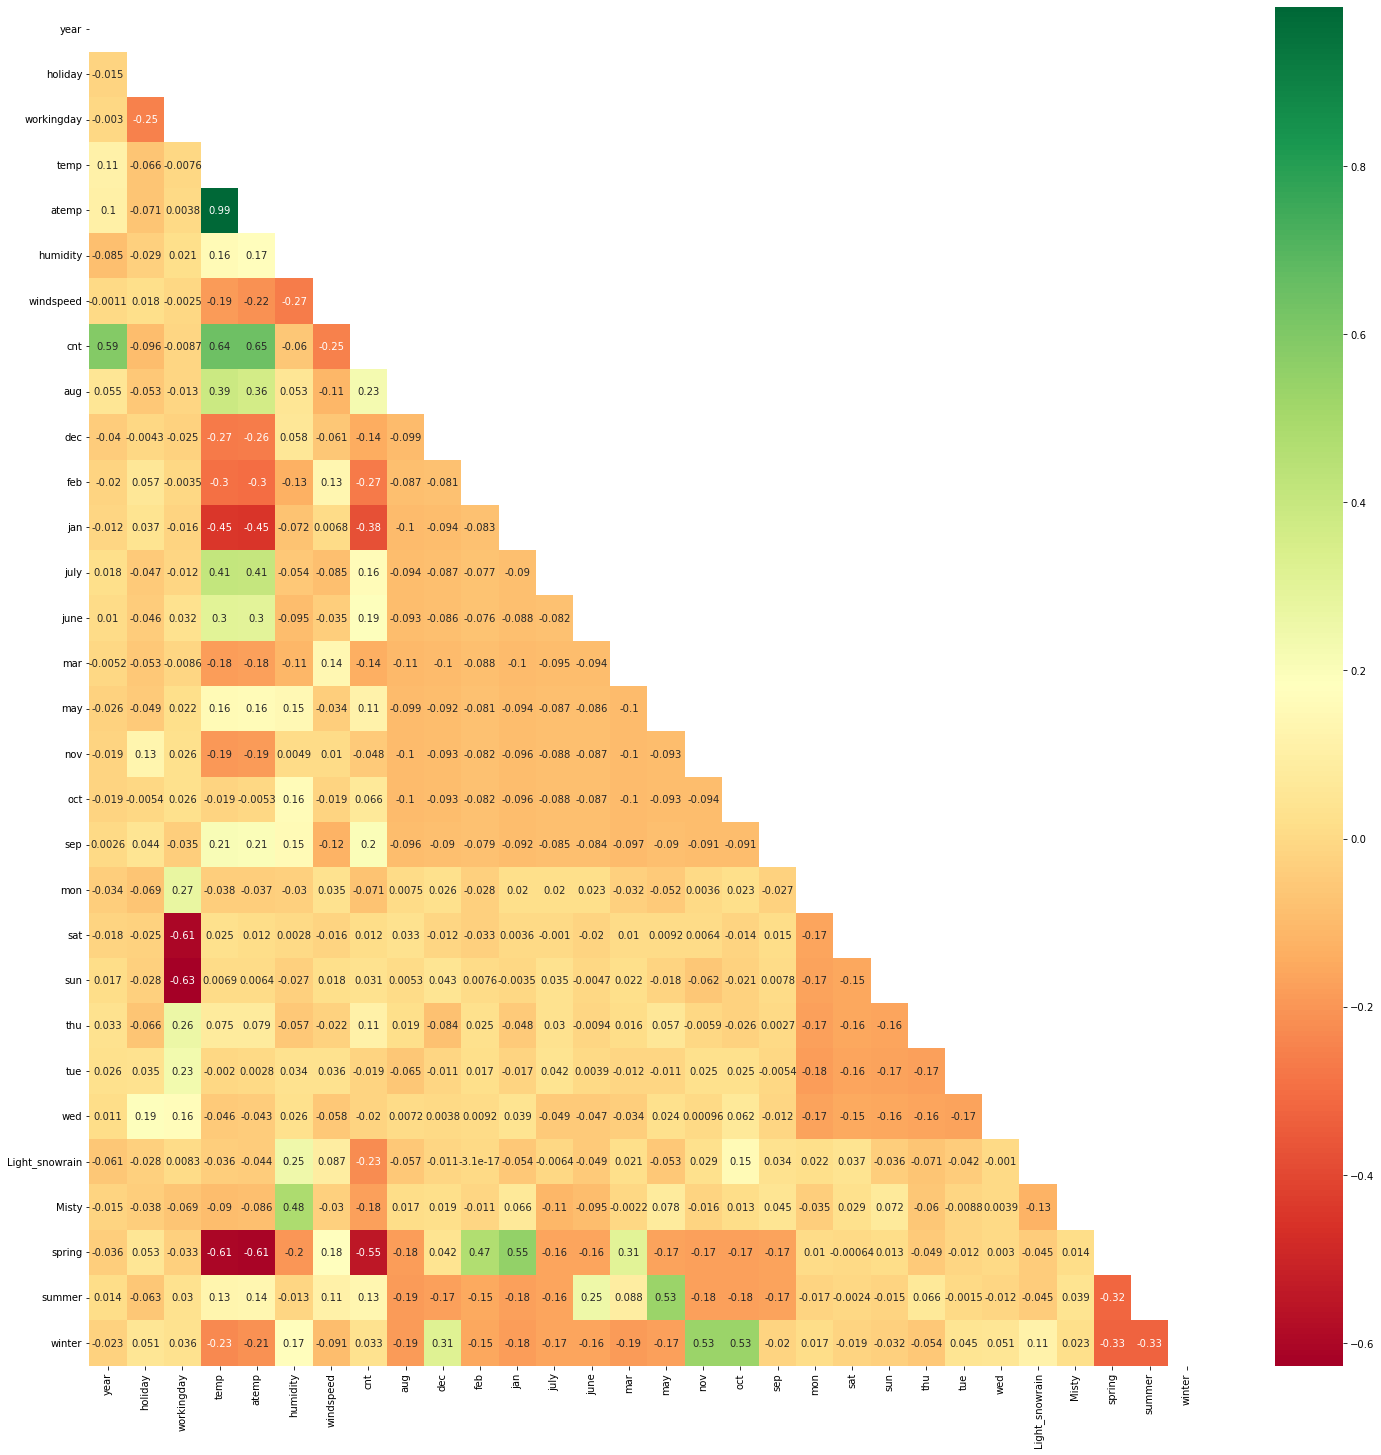

In [98]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

**`cnt` seems to have correlation with `year` variable and `temp`. Similarly, `Misty` and `humidity` show correlation. `Spring` season with `Jan` and `Feb` month, `Summer` season with `may` month and `Winter` season with `oct` and `nov month show good correlation.**

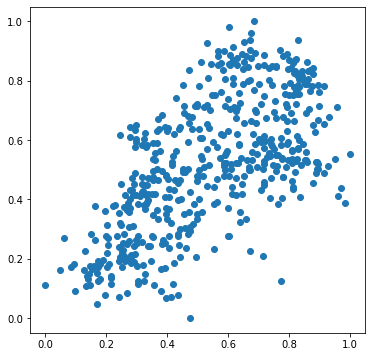

In [99]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

**`Visualization confirms the positive correlation between temp and cnt.`**

In [100]:
# Dividing into X & Y Sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

## `G) Building the Model`

In [101]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)     # Running RFE
rfe = rfe.fit(X_train, y_train)

In [102]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [103]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [105]:
# checking the columns which have been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [106]:
# Defining function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [107]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [108]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,Misty,2.32
0,year,2.09
8,nov,1.83
6,jan,1.75


**`Humidity indicates a high VIF Value`**

In [109]:
# Building 1st Linear Regression Model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.34e-189
Time:                        14:33:36   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

In [110]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.94
11,spring,2.89
12,summer,2.23
0,year,2.07
7,nov,1.80
5,jan,1.66
6,july,1.59
10,Misty,1.56


**`VIF Value seems to be good. But we wii see if we can reduce further!`**

In [111]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.57e-186
Time:                        14:34:53   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

In [112]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.23
0,year,2.07
12,winter,2.06
5,jan,1.65
6,july,1.59
9,Misty,1.56
7,sep,1.34


**`VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.`**

In [113]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.20e-186
Time:                        14:36:25   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2288      0.031      7.

In [114]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
9,spring,2.75
10,summer,2.22
0,year,2.07
11,winter,1.79
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [115]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.97e-187
Time:                        14:37:12   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.030      7.

In [116]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.21
8,spring,2.08
0,year,2.07
10,winter,1.79
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [117]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.40e-187
Time:                        14:37:39   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1996      0.030      6.

In [118]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,Misty,1.54
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


**`VIF Value now seems to be good as it came below 5.`**

In [119]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          7.36e-187
Time:                        14:38:48   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1910      0.030      6.

**`We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant`**

In [120]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.190994
year              0.234060
holiday          -0.096865
temp              0.478177
windspeed        -0.148155
sep               0.090932
Light_snowrain   -0.286002
Misty            -0.080124
spring           -0.055092
summer            0.060987
winter            0.095929
dtype: float64

## `H)Residual Analysis of the Train Data`

**`So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.`**

In [121]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,1,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1


In [122]:
y_train_pred = lr_6.predict(X_train_lm_6)

**1) Normality of error terms**

Text(0.5, 0, 'Errors')

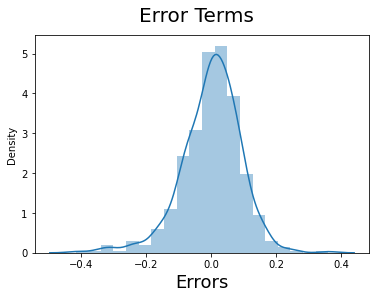

In [127]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**`Error Terms are following Normal Distribution`**

**2) Multicollinearity Check**

In [153]:
# Checking for MultiCollinearity

calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,Misty,1.54
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


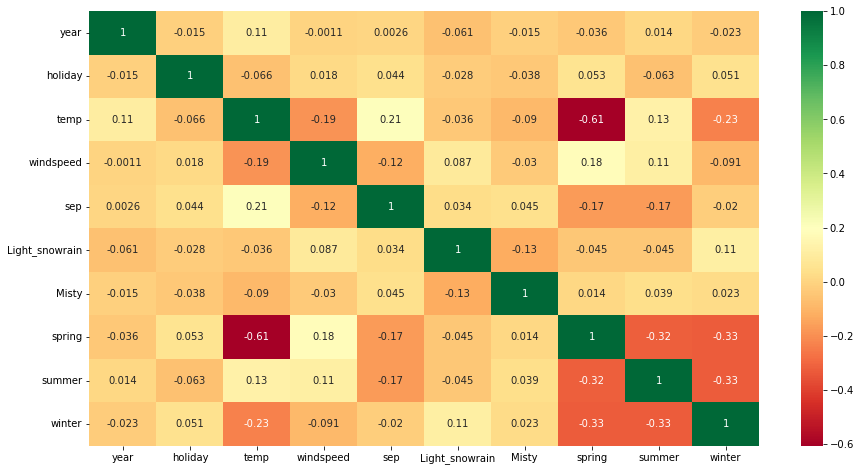

In [129]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

**`VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.`**

**3) Linearity**

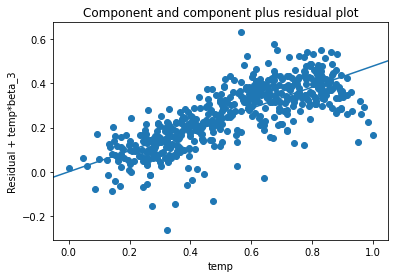

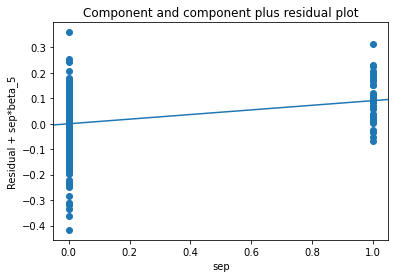

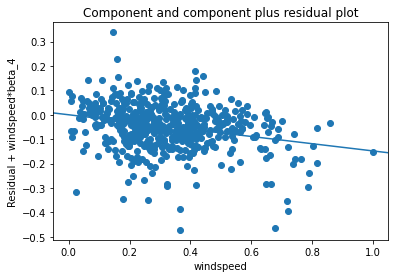

In [154]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

**`Linearity can be observed from above visualizations.`**

**4) Homoscedasticity**

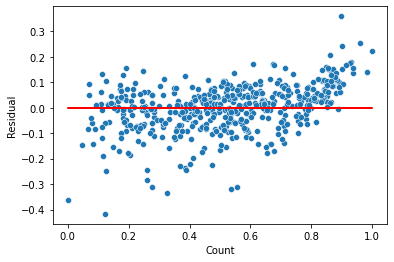

In [155]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**`No visible pattern observed from above plot for residuals.`**

**5) Independence of residuals**

`Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.`

## `I) Making Predictions`

**`Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.`**

In [132]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [133]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
y_test = df_test.pop('cnt')
X_test = df_test

KeyError: 'cnt'

In [137]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [138]:
y_pred = lr_6.predict(X_test_lm_6)

In [139]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8035

## `J) Model Evaluation`

Text(0, 0.5, 'y_pred')

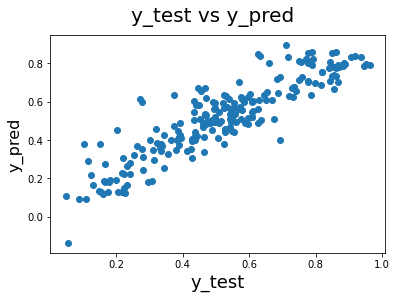

In [140]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [141]:
round(lr_6.params,4)

const             0.1910
year              0.2341
holiday          -0.0969
temp              0.4782
windspeed        -0.1482
sep               0.0909
Light_snowrain   -0.2860
Misty            -0.0801
spring           -0.0551
summer            0.0610
winter            0.0959
dtype: float64

**`We can see that the equation of our best fitted line is:`*

**`𝑐𝑛𝑡=0.1909+0.2341×𝑦𝑒𝑎𝑟−0.0963×ℎ𝑜𝑙𝑖𝑑𝑎𝑦
       +0.4777×𝑡𝑒𝑚𝑝−0.1481×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0910×𝑠𝑒𝑝−0.2850×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0787×𝑀𝑖𝑠𝑡𝑦−0.0554×𝑠𝑝𝑟𝑖𝑛𝑔
       +0.0621×𝑠𝑢𝑚𝑚𝑒𝑟+0.0945×𝑤𝑖𝑛𝑡𝑒𝑟`**

In [142]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7941


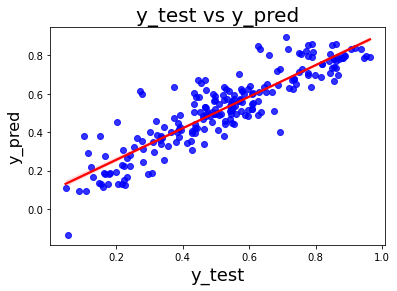

In [143]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## **Comparision between Training and Testing dataset:**

>- Train dataset R^2          : 0.833
>- Test dataset R^2           : 0.8038
>- Train dataset Adjusted R^2 : 0.829    
>- Test dataset Adjusted R^2  : 0.7944



## After analysing the above model, the comapany should focus on the following features:
>1- Company should focus on expanding business during Spring.

>2- Company should focus on expanding business during September.

>3- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

>4- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

## _`Conclusion`_
***Significant variables to predict the demand for shared bikes are:-***
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)